# Uncovering Principal Component Analysis: An activity on AMAT 255 - Mathematical Data Science
by Cristian B. Jetomo

As technology continue to progress, datasets about almost every aspect became easily available to the public for visualization and analysis. Solving problems using data-oriented approaches became much easier to do due to how rapid and vast datasets are growing. But with this rapid growth, along comes challenges in handling its large-scale nature. Additionally, as we want to model reality using our data to gain more accurate and realistic analyses and conclusions, our need for high-dimensional data prevails and the available samples in our datasets become sparse. This leads to the **curse of dimensionality** where handling feature-abundant or high-dimensional data becomes extremely challenging.

To address these problems, data scientists work on **Dimensionality Reduction** as a separate field of endeavor. The objective here is to capture meaningful properties of high-dimensional datasets using its corresponding much lower-dimensional projection. Visualization and analysis is implemented on these low-dimensional projections which makes it a computationally less expensive task. Various algorithms are being developed to do this (e.g., Feature Selection, Feature Extraction, Embedding Methods, Manifold Projections, and more). Here, we focus on one of the most knowned approach, i.e., the **Principal Component Analysis (PCA)**.

In this activity, we are going to uncover the algorithm behind PCA using only some tools in Linear Algebra. We implement PCA on a chosen dataset and identify the 1-dim, 2-dim, and 3-dim approximation that best separates the dataset into clusters according to their classes. Then, we visually and empirically analyze these approximations.

\
**Remarks:**
- Codes used in this activity are inspired from https://bagheri365.github.io/blog/Principal-Component-Analysis-from-Scratch/
- To play with the interactive plots, access this notebook at https://drive.google.com/file/d/1AfAa_l452Pe4Yk0C8CQEBzfulFnIxYUF/view?usp=sharing via Google Colab.

In [1]:
# install necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style='ticks')

import matplotlib as mpl
mpl.rcParams['scatter.edgecolors'] = 'black'
mpl.rcParams['figure.dpi'] = 150

## Dataset Description

Early detection of breast cancer remains the cornerstone of effective breast cancer treatment. Early detection usually involves screening procedures such as mammography before symptoms appear. Mammograms offer several advantages such as their widespread use in hospitals, ease of storage, relatively short examination time for radiologists, and low cost. However, radiologists face numerous challenges in interpreting mammograms including low image resolution, the size and location of the lesion in the breast tissue, and the presence of dense breast tissue, particularly in younger patients. These factors make it difficult to accurately detect tumors and increase the risk of misdiagnosis. Such limitations raises the need for computer-aided systems, supported with machine learning models.

As an example of how this is currently being implemented, we use the Breast Cancer Wiscosin (Diagnostic) dataset in this activity. It consists of 569 samples each with 30 attributes. Each sample has a unique identifier (id) and is categorized according to diagnosis: Benign (B) or Malignant (M). The 30 attributes are some information obtained from the breast mass mammography scans of each sample. In this activity, we focus only on 7 attributes namely: *radius_mean*, *texture_mean*, *perimeter_mean*, *smoothness_mean*, *compactness_mean*, *concavity_mean*, and *symmetry_mean*. We'll use these 7 features to simplify our implementation of dimension reduction, specifically using PCA.

In [2]:
# importing dataset
breast_cancer = pd.read_csv('breast-cancer.csv')
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
# limit to 7 features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean']
label = ['diagnosis']
breast_cancer = breast_cancer[label+features]

# display 10 samples from the dataset
breast_cancer.iloc[np.random.randint(0,569, size=10), :]

,diagnosis,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean
362,B,12.760,18.84,81.87,0.09676,0.07952,0.026880,0.1759
309,B,13.050,13.84,82.71,0.08352,0.03735,0.004559,0.1453
275,B,11.890,17.36,76.20,0.12250,0.07210,0.059290,0.2015
220,B,13.650,13.16,87.88,0.09646,0.08711,0.038880,0.1360
342,B,11.060,14.96,71.49,0.10330,0.09097,0.053970,0.1776
69,B,12.780,16.49,81.37,0.09831,0.05234,0.036530,0.1590
391,B,8.734,16.84,55.27,0.10390,0.07428,0.000000,0.1985
495,B,14.870,20.21,96.12,0.09587,0.08345,0.068240,0.1487
194,M,14.860,23.21,100.40,0.10440,0.19800,0.169700,0.1737
350,B,11.660,17.07,73.70,0.07561,0.03630,0.008306,0.1671


In [ ]:
# export final dataset for replication
breast_cancer.to_csv('breast-cancer_sample.csv',
                     index=False)

In [ ]:
breast_cancer = pd.read_csv('breast-cancer_sample.csv')

## Exploring the Dataset

Let's first visualize our dataset to have a sense of what it looks like. Here, we look at each pair-wise scatter plot of features of the dataset to perhaps see easily observable patterns, trends, and clustering.

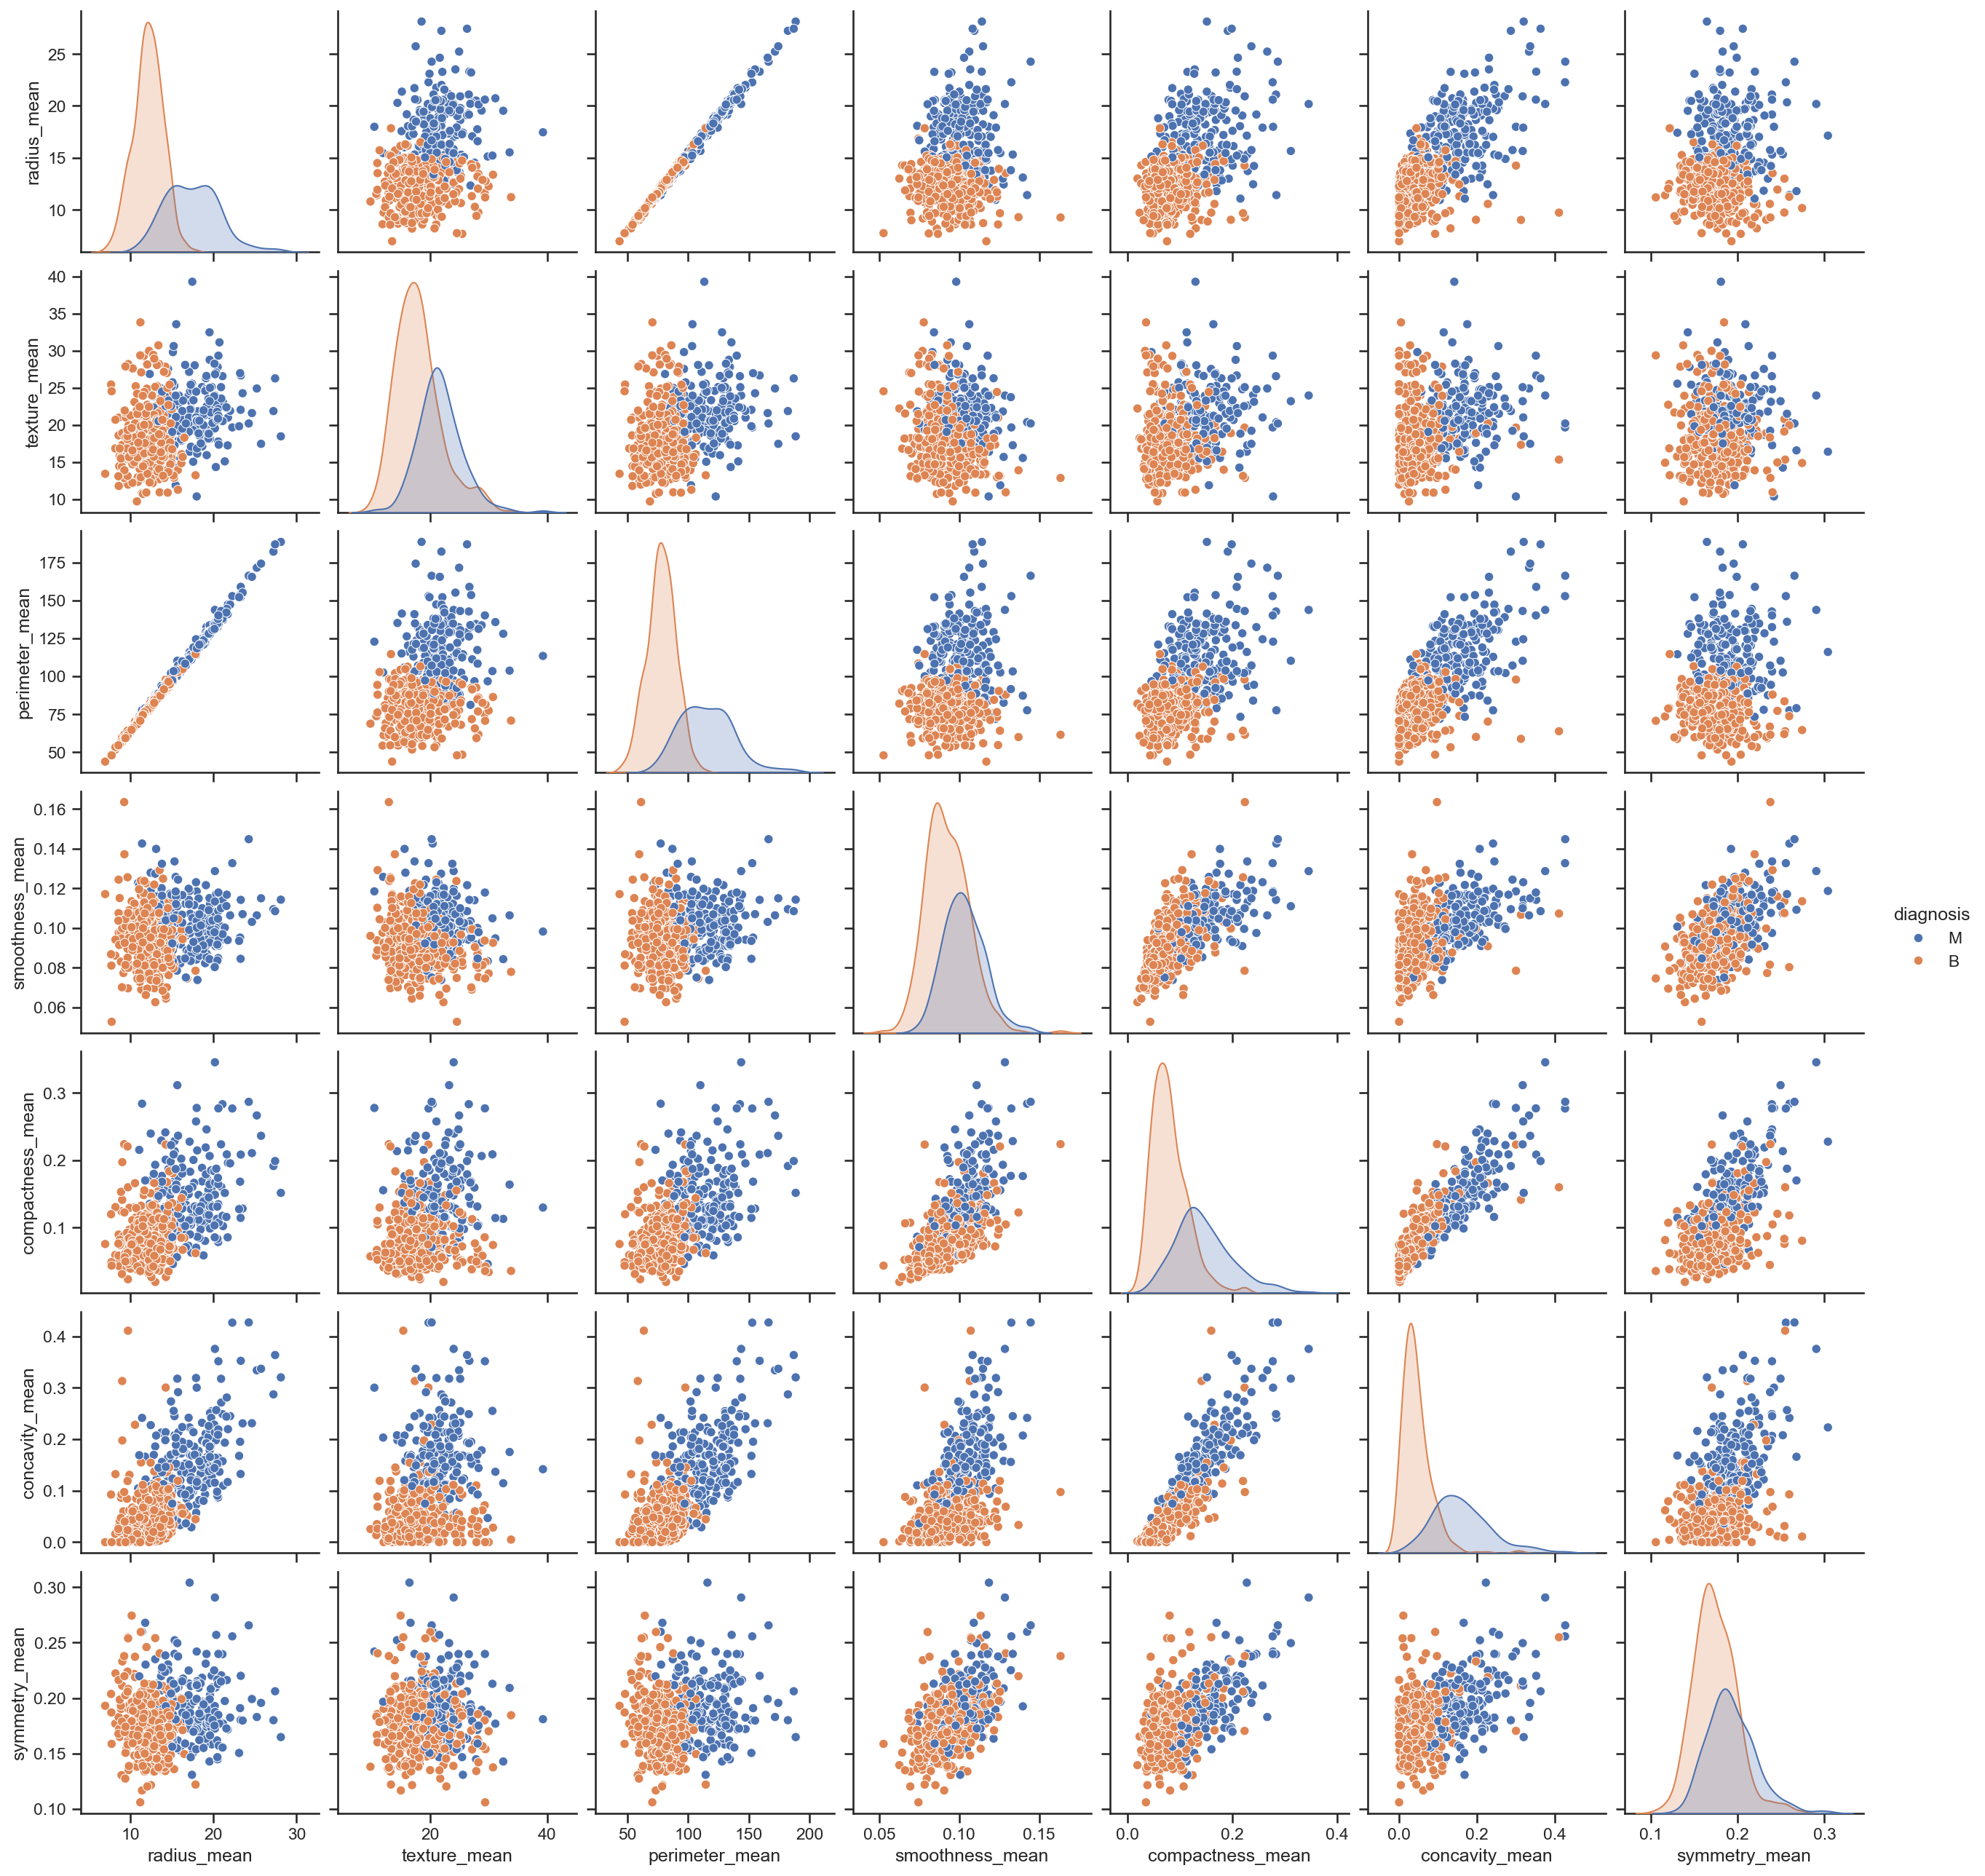

In [4]:
sns.pairplot(breast_cancer, hue="diagnosis")
plt.show()

From the result, we observe a symmetric grid that corresponds to the pairwise scatter plots of features from the dataset. Orange samples have diagnosis of "B" while blue samples are diagnosed as "M". The first noticeable plot here is the scatter plot for the *radius_mean* and *perimeter_mean*. It is clear that there is a positive linear correlation between the two features/variables. Since our problem is to reduce the dimension of our dataset, this could perhaps suggest that we can remove one of the two features and could still obtain similar analysis from the dataset. Additionally, from this linear relationship, it can also be observed how "B" and "M" samples are clustered separately from one another. Some overlaps, however, can still be observed which may affect our overall clustering of samples.

For a more clear look into each pairwise scatter plot, we can use the interactive plot below and change our x- and y-variables.

**Note:** Interactive plots only work in Google Colab.

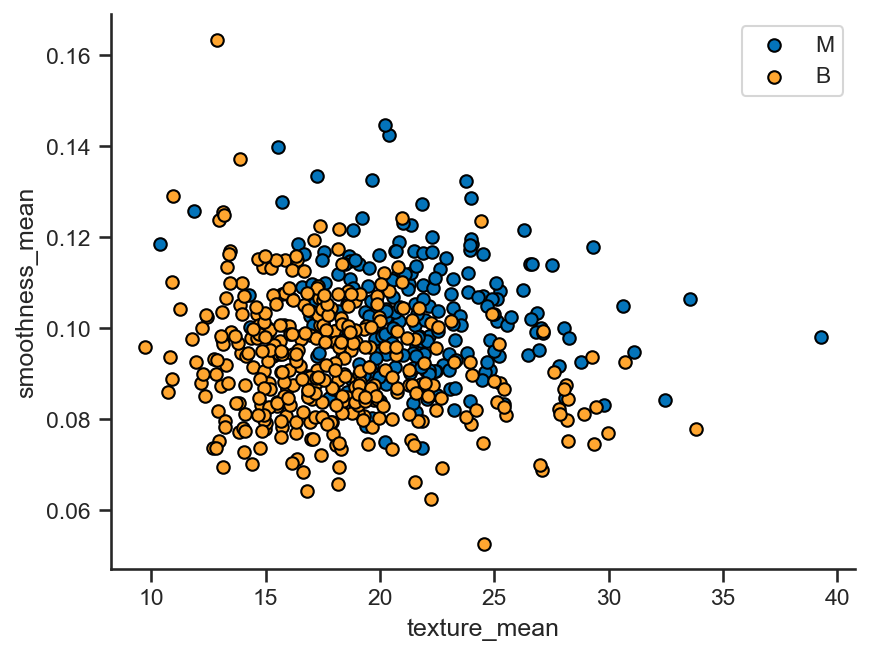

In [5]:
# from ipywidgets import interact, fixed

def plot_2dscatter(dataset:pd.DataFrame, x:str, y:str, ax=None):

    colors = ["#0474BA", "#FFA630"]  # colors for samples from "M" and "B", resp.
    ax = ax or plt.gca()
    ax.scatter(dataset[dataset['diagnosis']=="M"][x],
               dataset[dataset['diagnosis']=="M"][y], c=colors[0], label='M')
    ax.scatter(dataset[dataset['diagnosis']=="B"][x],
               dataset[dataset['diagnosis']=="B"][y], c=colors[1], label='B')

    ax.legend()
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    sns.despine()

# interact(plot_2dscatter, dataset=fixed(breast_cancer),
#          x=features, y=features, ax=fixed(None));

plot_2dscatter(breast_cancer, x='texture_mean', y='smoothness_mean')

# try:
# x=radius_mean, y=perimeter_mean
# x=texture_mean, y=smoothness_mean

The scatter plot for the *texture_mean x smoothness_mean* shows difficulty of the two features to separate the samples according to their clusters. The same is true for other pairwise combination of features. Finding a decision boundary curve from this plot that identifies whether a sample has a benign or malignant tumor is clearly a challenging task.

Hence, we extend to the 3-dim plots and find if there is a 3-feature combination that establishes a clear separation between the samples according to their diagnosis. For this, we can play with the interactive plot below.

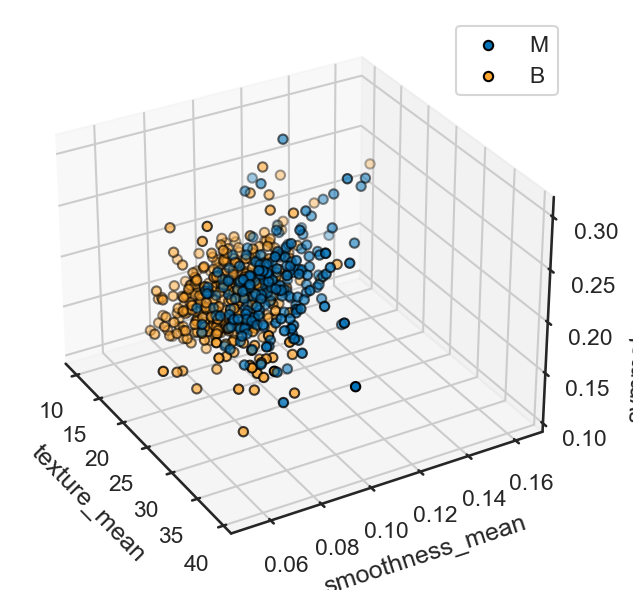

In [6]:
def plot_3dscatter(dataset:pd.DataFrame, x:str='texture_mean', y:str='smoothness_mean', z:str='symmetry_mean',
                   azim:float=-30, elev:float=30, ax=None):

    colors = ["#0474BA", "#FFA630"]
    ax = ax or plt.subplot(projection='3d')
    ax.view_init(azim=azim, elev=elev)

    ax.scatter3D(dataset[dataset['diagnosis']=="M"][x],
                 dataset[dataset['diagnosis']=="M"][y],
                 dataset[dataset['diagnosis']=="M"][z],
                 c=colors[0], label='M')
    ax.scatter3D(dataset[dataset['diagnosis']=="B"][x],
                 dataset[dataset['diagnosis']=="B"][y],
                 dataset[dataset['diagnosis']=="B"][z],
                 c=colors[1], label='B')

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    ax.legend()


# interact(plot_3dscatter, dataset=fixed(breast_cancer),
#          x=features, y=features, z=features,
#          azim=(-150, 150), elev=(0,90), ax=fixed(None));
plot_3dscatter(breast_cancer, x='texture_mean', y='smoothness_mean', z='symmetry_mean',
               azim=-30, elev=30)

# try the ff: x = texture_mean, y=smoothness_mean, z=symmetry_mean, azim=-30, elev=30

Same observations are seen from the 3d plot. The 3-features combination struggle to separate the "B" and "M" clusters. More overlaps are observed which makes it difficult to identify whether a new sample will be diagnosed as having a Benign ("B") tumor or a Malignant ("M") one. This leads to higher chance of False Positives or False Negatives.

Beyond these 2-dim and 3-dim plots, there's always the question that perhaps a higher dimensional plot could separate the clusters better. However, we are only restricted to visualizing until 3 dimensions which makes this problem more challenging. This prompts the question on whether we can leverage our cognitive ability to find patterns in lower dimensions while at the same time capture properties underlying in the high dimensions that best clusters the dataset. This is where PCA comes in.

## The Whats and Hows of PCA

In the mathematical sense, suppose we have a dataset $D \in \mathbb{R}^{d \times N}$ having $N$ samples each with $d$ features. The assumption is that $D$ is centered (having mean 0). This implies that each sample $x \in \mathbb{R}^{d \times 1} = \mathbb{R}^{d}$. We consider an orthonormal basis $\mathcal{U}$ for $D$ given by $ \mathcal{U} = \{ u_1, u_2, \ldots, u_d\} $
so that
$$u_i^Tu_i = \left\{ \begin{matrix} 1 , \qquad i=j \\ 0, \qquad i\neq j \end{matrix} \right.$$

Now, for all $x \in \mathbb{R}^d$, there exists $a = (\alpha_1 \alpha_2 \ldots \alpha_d)^T$ such that
$$ x = \sum_{i=1}^d \alpha_i u_i = Ua$$


From this dataset, our objective is to get a representation $x'$ for each sample $x$ such that the Mean Square Error (MSE) of the representation is minimized. Meanwhile, the goal of PCA is to seek a small number of dimensions that are interesting as possible, where the concept of "interesting" is measured by how varied (variance) the representations are along each dimension. Interestingly, our goal to minimize the MSE of the representation corresponds to maximizing its variance (Var). This means that by implementing PCA, we still meet our objective to find a good representation for our samples.

In PCA, the approach is to find the dimension $r$ of projection such that $r << d$ and $x' = \sum_{i=1}^r \alpha_i u_i =U_ra_r\approx x$ where $U_r = [u_1 u_2 \ldots u_r] \in \mathbb{R}^{d \times r}$ and $a_r = (\alpha_1 \alpha_2 \ldots \alpha_r)^T$.

\
For $r=1$, we choose $u_1 \in \mathbb{R}^d$ such that
$$ Var\{ x' = u_1u_1^T x\}$$
is maximized, subject to $u_1u_1^T = 1$.

Solving this using Lagrange Multipliers, the result shows that $u_1$ is the eigenvector corresponding to the largest eigenvalue of the covariance matrix $\Sigma$ of the dataset $D$ given by
$$ \Sigma = \frac{1}{N} \sum_{i=1}^N x_ix_i^T $$

\
For $r=2$, we find $u_2 \in \mathbb{R}^d$ such that
$$ Var\{ x' = u_2u_2^T x\}$$
is maximized, subject to $u_2^Tu_2 = 1$ and $u_2^Tu_1=0$ to ensure orthonormality.

Using Lagrange Multipliers again, the results shows that $u_2$ is the eigenvector associated with the second largest eigenvalue of $\Sigma$.

\
Extending this until $r \to d$, we find that projecting the samples to the $r$ eigenvector corresponding to the $r$ largest eigenvalue of $\Sigma$ provides us with the maximum variance of the representations and Minimum MSE. The projection (or representation) points of the samples are what we call the **principal components**.

## Computing for PCA

Now, we implement PCA in Python using Linear Algebra. Let's first separate the features and labels in our dataset and center the features into having a mean of 0 and standard deviation of 1.

In [7]:
# separating features and labels
X = breast_cancer.iloc[:, 1:].to_numpy()
y = breast_cancer.iloc[:, 0].to_numpy()
y = np.array([1 if target == 'M' else 0 for target in y])  # 'M'-> 1, 'B' -> 0

# center dataset
X = (X - X.mean(axis=0))/np.std(X, axis=0)
print(f'Dataset is prepared. There are {X.shape[0]} observations in total, each with {X.shape[1]} attributes/features.')

Dataset is prepared. There are 569 observations in total, each with 7 attributes/features.


Since the obtained $u_i$'s are the eigenvectors associated with the largest eigenvalues of the covariance matrix $\Sigma$, we first compute for $\Sigma$ and find its eigenvector-eigenvalue pairs.

In [8]:
# compute for its covariance matrix
cov_matrix = np.cov(X, rowvar=False)  # rowvar set to False to indicate that rows of X are observations
print(f'The covariance matrix of the features is: \n {pd.DataFrame(cov_matrix)}')

The covariance matrix of the features is: 
           0         1         2         3         4         5         6
0  1.001761  0.324352  0.999612  0.170882  0.507015  0.677955  0.148001
1  0.324352  1.001761  0.330113 -0.023430  0.237119  0.302950  0.071527
2  0.999612  0.330113  1.001761  0.207643  0.557917  0.717396  0.183349
3  0.170882 -0.023430  0.207643  1.001761  0.660284  0.522903  0.558757
4  0.507015  0.237119  0.557917  0.660284  1.001761  0.884675  0.603702
5  0.677955  0.302950  0.717396  0.522903  0.884675  1.001761  0.501548
6  0.148001  0.071527  0.183349  0.558757  0.603702  0.501548  1.001761


In [9]:
from numpy.linalg import eig

# compute for eigenvalues and eigenvectors of the covariance matrix
e_values, e_vectors = eig(cov_matrix)

print(f'Eigenvector-eigenvalue pairs are obtained. \n Shape of Eigenvalue: {e_values.shape} \n Shape of Eigenvector: {e_vectors.shape}')

Eigenvector-eigenvalue pairs are obtained. 
 Shape of Eigenvalue: (7,) 
 Shape of Eigenvector: (7, 7)


Now, we sort the obtained eigenvalues and their corresponding eigenvectors from largest to smallest to find the best eigenvectors that maximizes the variance and minimizes the error in the projections.

In [10]:
max_abs_idx = np.argmax(np.abs(e_vectors), axis=0)
signs = np.sign(e_vectors[max_abs_idx, range(e_vectors.shape[0])])
e_vectors = e_vectors*signs[np.newaxis,:]

# sort the eigenvalues and associated eigenvectors
sorted_indices = np.argsort(-e_values)
e_values = e_values[sorted_indices]
e_vectors = e_vectors[:, sorted_indices]

print('Eigenvalues and eigenvectors are sorted accordingly.')
## This means that e_values[0] is the largest eigenvalue
## and e_vectors[0] is its associated eigenvector.

Eigenvalues and eigenvectors are sorted accordingly.


Finally, we are now ready to project our samples. We choose the first $r$ eigenvectors where $r$ is the dimension of our projection space. In this activity, we choose $r=3$ in order to visualize how well the projections cluster the dataset under 1-dim, 2-dim, and 3-dim representations.

In [11]:
r = 3
U = e_vectors[:, :r]  # projection matrix
proj = np.matmul(U.T, X.T) # projection
proj = proj.T

print(f'Projection complete. \n Shape of original dataset: {X.shape} \n Shape of projection matrix: {U.shape} \n Shape of projected dataset: {proj.shape}')

Projection complete. 
 Shape of original dataset: (569, 7) 
 Shape of projection matrix: (7, 3) 
 Shape of projected dataset: (569, 3)


## Principal Components Visualization

Let's now visualize the principal components into 1-dim, 2-dim, and 3-dim scatter plots to gain a sense as to how much these components clusters our dataset.

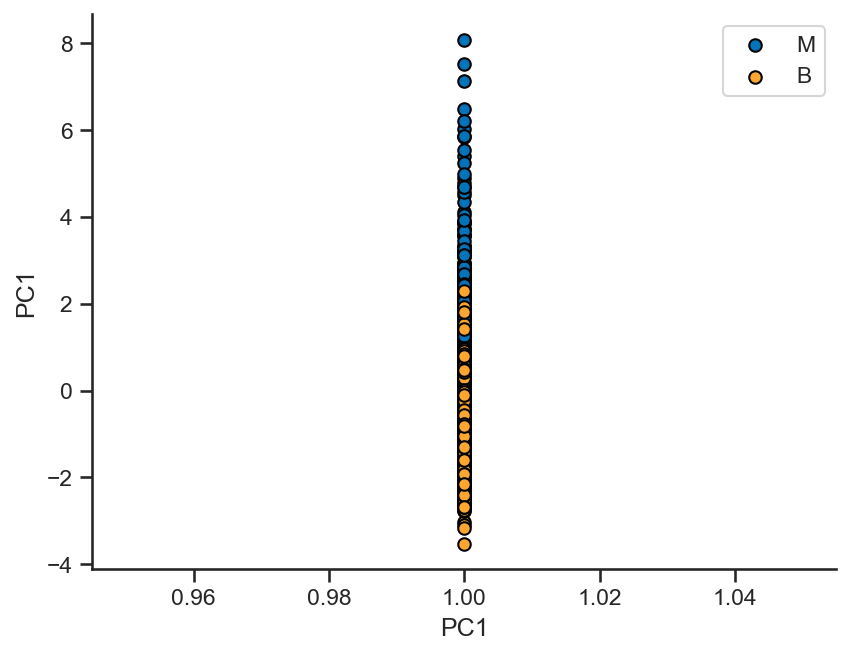

In [12]:
def plot_1dPC(proj:np.ndarray, y:np.ndarray, component:int=1, ax=None):

    colors = ['#0474BA', '#FFA630']
    ax = ax or plt.gca()
    ax.scatter(np.full_like(proj[y==1, component-1],1), proj[y==1,component-1], c=colors[0], label='M')
    ax.scatter(np.full_like(proj[y==0, component-1],1), proj[y==0,component-1], c=colors[1], label='B')

    ax.set_xlabel(f"PC{component}")
    ax.set_ylabel(f"PC{component}")
    ax.legend()
    sns.despine()

# interact(plot_1dPC, proj=fixed(proj), y=fixed(y), component=np.arange(r)+1, ax=fixed(None));
plot_1dPC(proj, y, component=1)

From the figure, we see how the first principal component separates the clusters well. Although the separation is similar to the *radius_mean x perimeter_mean* above, this plot only uses 1 feature to be able to separate the samples in this way, making it an efficient parameter for clustering the samples.

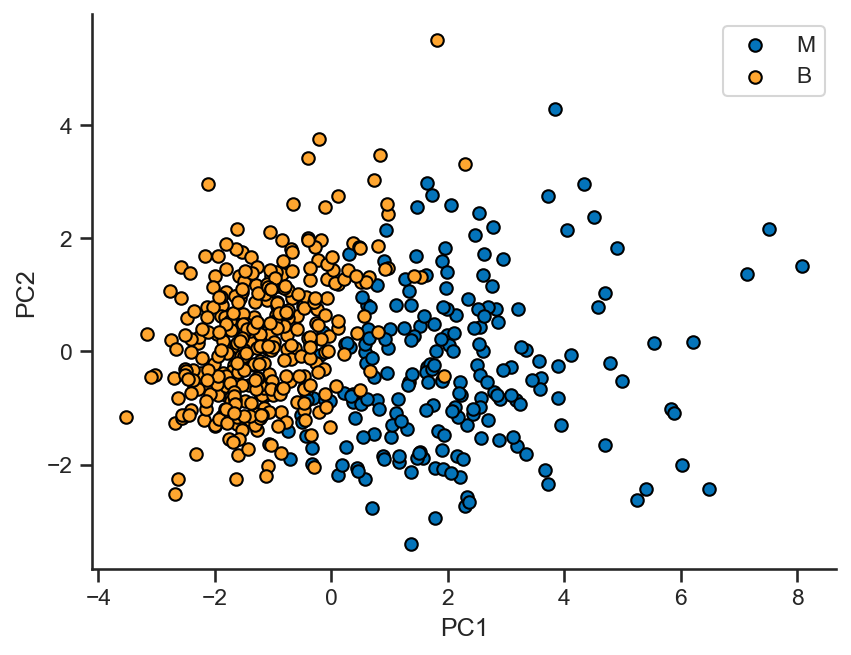

In [13]:
def plot_2dPC(proj:np.ndarray, y:np.ndarray, component1:int=1, component2:int=2, ax=None):

    colors = ['#0474BA', '#FFA630']
    ax = ax or plt.gca()
    ax.scatter(proj[y==1, component1-1], proj[y==1,component2-1], c=colors[0], label='M')
    ax.scatter(proj[y==0, component1-1], proj[y==0,component2-1], c=colors[1], label='B')

    ax.set_xlabel(f"PC{component1}")
    ax.set_ylabel(f"PC{component2}")
    ax.legend()
    sns.despine()

# interact(plot_2dPC, proj=fixed(proj), y=fixed(y),
#          component1=np.arange(r)+1,
#          component2=np.arange(r)+1, ax=fixed(None));

plot_2dPC(proj, y, 1, 2)

Now, looking at the 2d scatter plot for the first and second principal components, we see a more clear separation between the clusters. Even though there are still samples that are "joined" in the opposite cluster, the number of which are significantly less than the *texture_mean x smoothness_mean* and other 2-feature combination scatter plots above. This suggests better clustering ability by using the first 2 principal components on our dataset.

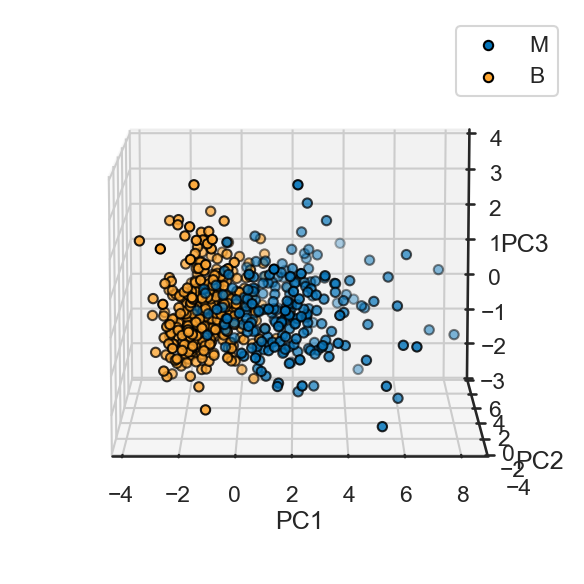

In [14]:
def plot_3dPC(proj:np.ndarray, y:np.ndarray,
              azim:float=-90, elev:float=10, ax=None):

    colors = ['#0474BA', '#FFA630']
    ax = ax or plt.subplot(projection='3d')
    ax.view_init(azim=azim, elev=elev)
    ax.scatter3D(proj[y==1, 0], proj[y==1,1], proj[y==1,2], c=colors[0], label='M')
    ax.scatter(proj[y==0, 0], proj[y==0,1], proj[y==0,2], c=colors[1], label='B')

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.legend()
    sns.despine()

# interact(plot_3dPC, proj=fixed(proj), y=fixed(y),
#          azim=(-150, 150), elev=(0,90), ax=fixed(None));

plot_3dPC(proj, y)

Finally, looking at the 3d scatter plot of the first, second, and third principal components, we see a better clustering of the two groups of samples than by using the original features, or by using only the first or first 2 principal components. From this plot, we see how well the samples are separated, making it ideal as a basis for clustering our dataset.

The question now is how much added benefit there is when we increase the number of principal components that we use. Is using only the first principal component enough? Or can we add more to gain better clustering? To answer this, we will be needing an empirical basis for comparison. Definitely, our analysis from the 3 plots above are purely visual. Hence, we need a *metric* for analyzing whether using the principal components definitely improves our clustering compared to using the original features.

## Variance Explained by the Principal Components

Recall that in PCA, the objective is to maximize the variance explained by the projected points (or principal components). Hence, it's better to use the variance as our metric for analysis.

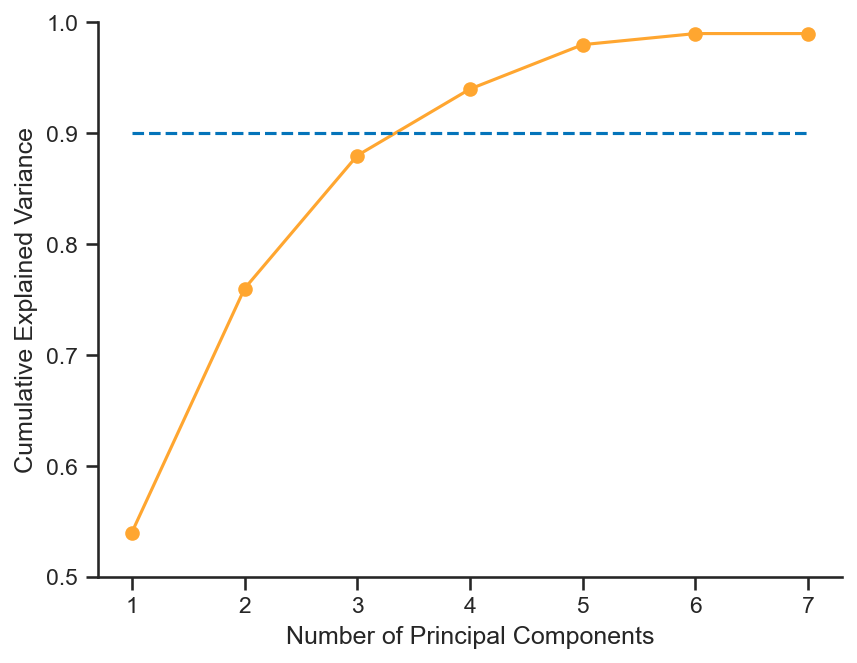

In [17]:
# explained variance
total_variance = e_values.sum()
explained_variance = np.round([eval/total_variance for eval in e_values],2)  # explained variance = e_value/sum(e_values)
cumulative_explained_variance = np.cumsum(explained_variance)

plt.plot(np.arange(1, X.shape[1]+1), cumulative_explained_variance, '-o', color='#FFA630')
plt.plot(np.arange(1, X.shape[1]+1), np.full_like(cumulative_explained_variance, 0.90), '--', color='#0474BA')
plt.ylim([0.50, 1])
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

sns.despine()
plt.show()

Notice from the plot that using 7 principal components, which essentially corresponds to all our original features, gives us a 100% cumulative explained variance. Meanwhile, using the first principal component, we only get 54% explained variance. Including the second principal component raises the cumulative explained variance to 76%, and using the first three principal components gives us 88%. This means that even if we have observed a good clustering in the plot of the first principal component, empirically speaking, our projection only captures 54% of the variance of the dataset. Incorporating the second principal component then adds 22% in the explained variance which suggests a clear improvement, reflecting the better clustering result for the 2d scatter plot above. Additional improvement of up to 12% in the explained variance is also provided by the third principal component which corresponds to the improvement in clustering and separation of clusters as seen in the 3d plot above.

In practice, we want our projections to explain at least 90% variance of the dataset. This means that using only 3 principal components is still insufficient. Instead, we need the first 4 principal components to gain 94% cumulative explained variance, satisfying our requirement.

## Takeaways and Conclusions

In this activity, we analyzed the Breast Cancer Wisconsin dataset and analyzed the features that can predict whether a sample will be diagnosed as having a benign or malignant tumor using some clustering techniques. We used 7 features from our dataset and deduced that using 2 to 3 features for clustering is insufficient to capture the overall shape and structure of our dataset.

To address this, we implemented a Dimensionality Reduction algorithm called the Principal Component Analysis (PCA). PCA essentially creates a new feature (called principal component) as a linear combination of the original 7 features. This new feature is obtained by projecting the original features onto a vector that maximizes the explained variance of the dataset. This vector, as we have shown, is in fact the eigenvector corresponding to the covariance matrix of the dataset.

In our implementation, we obtained the first 3 principal components of features from the dataset and have shown visually that the clusters of samples are separated better than by using only the original features. However, empirical evidence suggests that these 3 principal components only explains 88% of the variance of the dataset. It is suggested to have the first 4 principal components as features to obtain a better clustering of samples and an explained variance of 94%. In this way, the important properties of the dataset is still captured without sacrificing the need for high dimensions, reducing required computational resources.

Now, the next step for this is to use the first 4 principal components as features for clustering/classification. The result of this can then be compared with the result of using all 7 original features, giving us more intuition whether using PCA does improve our result for the problem.